In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split

# Part 1 - Explatory Data Analysis


In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head()


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:
#change 'valid' column to datetime format
dataset['valid'] = pd.to_datetime(dataset.valid)

In [4]:
print(dataset.shape)
dataset.describe()

(103713, 8)


,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [5]:
#checking data all comes from NZAA station
print(dataset[' station'].value_counts())

NZAA    103713
Name:  station, dtype: int64


In [6]:
#checking number of NaN in 'peak_wind_drct'
print(dataset['peak_wind_drct'].isnull().sum())
#removing 'peak_wind_drct'
dataset = dataset.iloc[:,:-1]

103713


In [7]:
#changing datetime to numerical columns
dataset2 = dataset.copy()
dataset2['minute'] = dataset2['valid'].dt.minute
dataset2['hour'] = dataset2['valid'].dt.hour
dataset2['day'] = dataset2['valid'].dt.day_of_year
dataset2['week'] = dataset2['valid'].dt.isocalendar().week
dataset2['month'] = dataset2['valid'].dt.month
dataset2['year'] = dataset2['valid'].dt.year
dataset2.head()

,station,valid,tmpc,dwpc,relh,sknt,gust,minute,hour,day,week,month,year
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,NaN,0,0,1,1,1,2015
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,NaN,30,0,1,1,1,2015
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,NaN,0,1,1,1,1,2015
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,NaN,30,1,1,1,1,2015
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,NaN,0,2,1,1,1,2015


Correlation Matrix and Plot

In [8]:
#correlation matrix
dataset2.corr()

,tmpc,dwpc,relh,sknt,gust,minute,hour,day,week,month,year
tmpc,1.000000,0.795403,-0.451405,0.235222,-0.168029,0.000708,-0.220016,-0.316280,-0.315268,-0.319187,0.009623
dwpc,0.795403,1.000000,0.177898,-0.007093,-0.153984,0.001841,-0.029649,-0.355290,-0.352824,-0.358895,0.001364
relh,-0.451405,0.177898,1.000000,-0.414763,-0.025576,0.001741,0.312912,-0.016858,-0.014540,-0.017478,-0.012113
sknt,0.235222,-0.007093,-0.414763,1.000000,0.962926,-0.003210,-0.229439,0.120510,0.123726,0.122855,0.005584
gust,-0.168029,-0.153984,-0.025576,0.962926,1.000000,0.041568,-0.031662,-0.037866,-0.035033,-0.039603,0.011841
minute,0.000708,0.001841,0.001741,-0.003210,0.041568,1.000000,-0.000103,0.000253,0.000286,0.000285,0.000492
hour,-0.220016,-0.029649,0.312912,-0.229439,-0.031662,-0.000103,1.000000,0.000016,0.000519,0.000030,0.001017
day,-0.316280,-0.355290,-0.016858,0.120510,-0.037866,0.000253,0.000016,1.000000,0.981409,0.996519,-0.000647
week,-0.315268,-0.352824,-0.014540,0.123726,-0.035033,0.000286,0.000519,0.981409,1.000000,0.979287,-0.004436
month,-0.319187,-0.358895,-0.017478,0.122855,-0.039603,0.000285,0.000030,0.996519,0.979287,1.000000,-0.001435


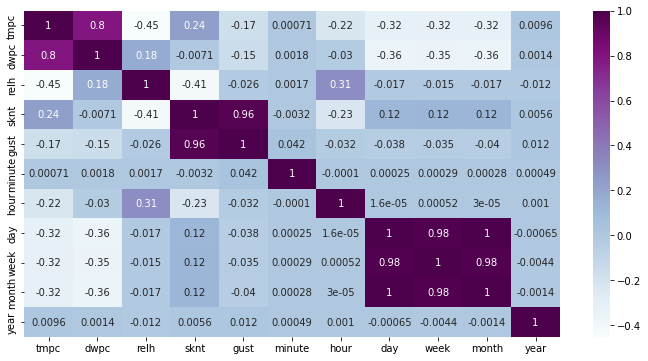

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset2.corr(), annot=True, cmap="BuPu")
plt.show()

array([<AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>,
       <AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>,
       <AxesSubplot:xlabel='valid'>], dtype=object)

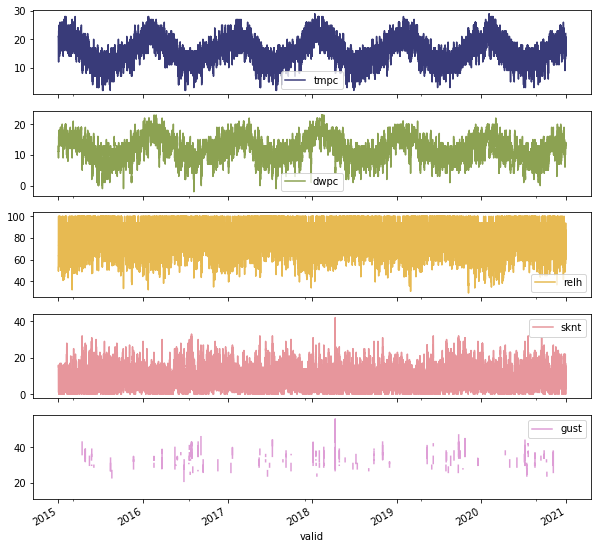

In [10]:
#plots of weather measurements
dataset.plot(x = 'valid',subplots = True, figsize=(10,10),colormap='tab20b')

# Initial Comments

To begin with, I checked if all the data comes from the NZAA station. The dataset is time series data and contains various weather measurements taken between 2015 and 2020. The dataset contains a column describing the date and time of capture, which has been converted to a DateTime object. There are six numerical data columns containing measurements. All the entries for the 'peak_wind_drct' column are missing, therefore I have removed that column as it is unusable. No other changes have been made to the data at this stage. 

After visualising the correlation plot and the individual measurement plots, I have chosen to model the temperature of the environment 'tmpc'. Of the time variables, day, week and month have the largest absolute correlations with 'tmpc'. The plot of 'tmpc' shows clear seasonality, with no obvious trend. 

# Part 2 - Data Preparation



In [11]:
dataset2 = dataset2.drop([' station','dwpc','relh','sknt','gust'], axis=1)
dataset2.head()

,valid,tmpc,minute,hour,day,week,month,year
0,2015-01-01 00:00:00,21.0,0,0,1,1,1,2015
1,2015-01-01 00:30:00,21.0,30,0,1,1,1,2015
2,2015-01-01 01:00:00,21.0,0,1,1,1,1,2015
3,2015-01-01 01:30:00,21.0,30,1,1,1,1,2015
4,2015-01-01 02:00:00,21.0,0,2,1,1,1,2015


In [12]:
print(dataset2.isna().sum())
dataset2.isna().sum().sum()

valid      0
tmpc      35
minute     0
hour       0
day        0
week       0
month      0
year       0
dtype: int64


35

In [13]:
#drop all rows with missing/null entries
dataset2 = dataset2.dropna()
dataset2.isna().sum().sum()

0

In [14]:
#reset key index
dataset2.reset_index()

,index,valid,tmpc,minute,hour,day,week,month,year
0,0,2015-01-01 00:00:00,21.0,0,0,1,1,1,2015
1,1,2015-01-01 00:30:00,21.0,30,0,1,1,1,2015
2,2,2015-01-01 01:00:00,21.0,0,1,1,1,1,2015
3,3,2015-01-01 01:30:00,21.0,30,1,1,1,1,2015
4,4,2015-01-01 02:00:00,21.0,0,2,1,1,1,2015
...,...,...,...,...,...,...,...,...,...
103673,103708,2020-12-30 21:30:00,19.0,30,21,365,53,12,2020
103674,103709,2020-12-30 22:00:00,19.0,0,22,365,53,12,2020
103675,103710,2020-12-30 22:30:00,20.0,30,22,365,53,12,2020
103676,103711,2020-12-30 23:00:00,20.0,0,23,365,53,12,2020


In [15]:
#making a copy of datetime information
dates = dataset2[['valid']].copy()
dataset2 = dataset2.drop(['valid'], axis=1)
dataset2.head()

,tmpc,minute,hour,day,week,month,year
0,21.0,0,0,1,1,1,2015
1,21.0,30,0,1,1,1,2015
2,21.0,0,1,1,1,1,2015
3,21.0,30,1,1,1,1,2015
4,21.0,0,2,1,1,1,2015


I dropped all the columns that are not relevant to the model. I also checked how many rows had a null or missing entry, as there were not many, I dropped these rows as well. The final model will be able to make predictions for temperature of the environment in celsius (tmpc) using the date and time information as features.

# Part 3 - Data Modelling

In [16]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [17]:
X = dataset2.iloc[:,1:7].to_numpy() 
y = dataset2[['tmpc']].to_numpy()

#time series cross validation 5 splits
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

splits = list(tscv.split(X, y))
print("Train-test split\n")
for i in range(5):
    train, test = splits[i]
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    print('\n')
    

TRAIN: [    0     1     2 ... 17280 17281 17282] TEST: [17283 17284 17285 ... 34559 34560 34561]
TRAIN: [    0     1     2 ... 34559 34560 34561] TEST: [34562 34563 34564 ... 51838 51839 51840]
TRAIN: [    0     1     2 ... 51838 51839 51840] TEST: [51841 51842 51843 ... 69117 69118 69119]
TRAIN: [    0     1     2 ... 69117 69118 69119] TEST: [69120 69121 69122 ... 86396 86397 86398]
TRAIN: [    0     1     2 ... 86396 86397 86398] TEST: [ 86399  86400  86401 ... 103675 103676 103677]
Train-test split

Training Observations: 17283
Testing Observations: 17279


Training Observations: 34562
Testing Observations: 17279


Training Observations: 51841
Testing Observations: 17279


Training Observations: 69120
Testing Observations: 17279


Training Observations: 86399
Testing Observations: 17279




In [18]:
model1 = KNeighborsRegressor(n_neighbors=1)
model2 = KNeighborsRegressor(n_neighbors=2)
model3 = KNeighborsRegressor(n_neighbors=3)
model4 = KNeighborsRegressor(n_neighbors=8)

In [19]:
#evaluation function
def evaluate(model, X, y, cv):
    cv_results = cross_validate(model,X,y,cv=cv,scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],)
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}\n"
    )
    

In [20]:
evaluate(model1, X_train, y_train.ravel(), cv=tscv)
evaluate(model2, X_train, y_train.ravel(), cv=tscv)
evaluate(model3, X_train, y_train.ravel(), cv=tscv)
evaluate(model4, X_train, y_train.ravel(), cv=tscv)


Mean Absolute Error:     2.308 +/- 0.096
Root Mean Squared Error: 2.988 +/- 0.101

Mean Absolute Error:     2.237 +/- 0.106
Root Mean Squared Error: 2.879 +/- 0.120

Mean Absolute Error:     2.193 +/- 0.113
Root Mean Squared Error: 2.821 +/- 0.131

Mean Absolute Error:     2.092 +/- 0.128
Root Mean Squared Error: 2.685 +/- 0.148



# Choosing model

In [21]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=8)

In [22]:
test_df = dates.iloc[test_index[0]:test_index[-1]+1 , 0:1]
tmpc_test = dataset2.iloc[test_index[0]:test_index[-1]+1 , 0:1]
test_df = dates.iloc[test_index[0]:test_index[-1]+1 , 0:1]
test_df = test_df.join(tmpc_test, how = 'left')
test_df = test_df.reset_index(drop=True)


In [23]:
tmpc_predictions1 = model1.predict(X_test)
tmpc_predictions1 = tmpc_predictions1.reshape(-1,1)
tmpc_col1 = pd.DataFrame(tmpc_predictions1, columns=['tmpc_pred1'])
test_df = test_df.join(tmpc_col1, how = 'right')

tmpc_predictions2 = model2.predict(X_test)
tmpc_predictions2 = tmpc_predictions2.reshape(-1,1)
tmpc_col2 = pd.DataFrame(tmpc_predictions2, columns=['tmpc_pred2'])
test_df = test_df.join(tmpc_col2, how = 'right')

tmpc_predictions3 = model3.predict(X_test)
tmpc_predictions3 = tmpc_predictions3.reshape(-1,1)
tmpc_col3 = pd.DataFrame(tmpc_predictions3, columns=['tmpc_pred3'])
test_df = test_df.join(tmpc_col3, how = 'right')

tmpc_predictions4 = model4.predict(X_test)
tmpc_predictions4 = tmpc_predictions4.reshape(-1,1)
tmpc_col4 = pd.DataFrame(tmpc_predictions4, columns=['tmpc_pred4'])
test_df = test_df.join(tmpc_col4, how = 'right')


In [24]:
test_df

,valid,tmpc,tmpc_pred1,tmpc_pred2,tmpc_pred3,tmpc_pred4
0,2020-01-05 06:30:00,18.0,20.0,18.5,18.333333,18.750
1,2020-01-05 07:00:00,18.0,17.0,18.5,18.333333,18.375
2,2020-01-05 07:30:00,19.0,19.0,18.0,17.666667,18.500
3,2020-01-05 08:00:00,19.0,19.0,17.5,18.333333,18.250
4,2020-01-05 08:30:00,19.0,19.0,17.5,18.000000,18.125
...,...,...,...,...,...,...
17274,2020-12-30 21:30:00,19.0,19.0,20.5,20.333333,20.500
17275,2020-12-30 22:00:00,19.0,22.0,20.5,21.000000,20.125
17276,2020-12-30 22:30:00,20.0,20.0,21.0,20.333333,20.625
17277,2020-12-30 23:00:00,20.0,22.0,20.5,21.000000,20.375


array([<AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>,
       <AxesSubplot:xlabel='valid'>, <AxesSubplot:xlabel='valid'>,
       <AxesSubplot:xlabel='valid'>], dtype=object)

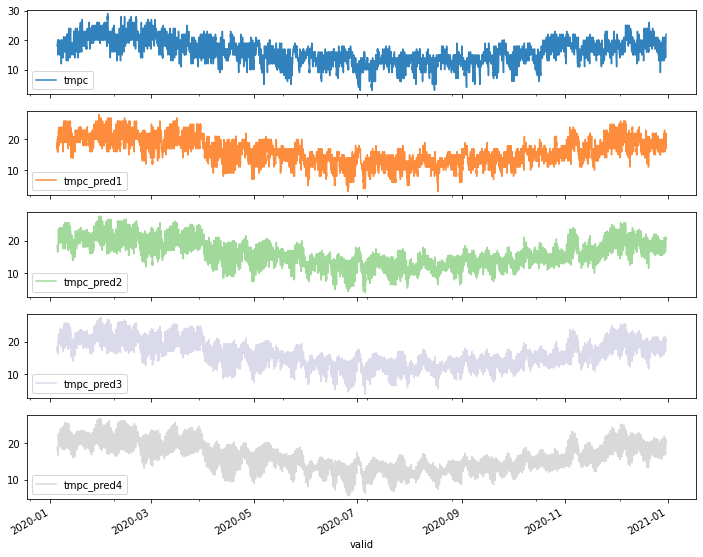

In [25]:
test_df.plot(x='valid', subplots = True,figsize=(12,10),colormap='tab20c' )

In [26]:
test_df.describe()

,tmpc,tmpc_pred1,tmpc_pred2,tmpc_pred3,tmpc_pred4
count,17279.000000,17279.000000,17279.000000,17279.000000,17279.000000
mean,15.744603,15.797442,15.763123,15.771534,15.781556
std,4.079272,4.150563,4.056255,4.016483,3.918966
min,3.000000,3.000000,4.000000,4.000000,5.625000
25%,13.000000,13.000000,13.000000,12.833333,12.875000
50%,16.000000,15.000000,15.500000,15.333333,15.375000
75%,19.000000,19.000000,18.500000,18.666667,18.625000
max,29.000000,28.000000,27.500000,27.333333,26.625000


In [27]:
#final model
fin_mod = model2.fit(X, y)

# New predictions for January 2021 (one month forecast)

In [28]:
#new date time data for January 2021
newdata = pd.DataFrame({'dates': pd.date_range(start ='2021-01-01', end ='2021-01-31', freq='30T')})
newdata.head()


,dates
0,2021-01-01 00:00:00
1,2021-01-01 00:30:00
2,2021-01-01 01:00:00
3,2021-01-01 01:30:00
4,2021-01-01 02:00:00


In [29]:
#coverting to date time data to useable form
newdata['minute'] = newdata['dates'].dt.minute
newdata['hour'] = newdata['dates'].dt.hour
newdata['day'] = newdata['dates'].dt.day_of_year
newdata['week'] = newdata['dates'].dt.isocalendar().week
newdata['month'] = newdata['dates'].dt.month
newdata['year'] = newdata['dates'].dt.year
newdata.head()


,dates,minute,hour,day,week,month,year
0,2021-01-01 00:00:00,0,0,1,53,1,2021
1,2021-01-01 00:30:00,30,0,1,53,1,2021
2,2021-01-01 01:00:00,0,1,1,53,1,2021
3,2021-01-01 01:30:00,30,1,1,53,1,2021
4,2021-01-01 02:00:00,0,2,1,53,1,2021


In [30]:
X_new = newdata.iloc[:,1:7].to_numpy()

<AxesSubplot:xlabel='dates'>

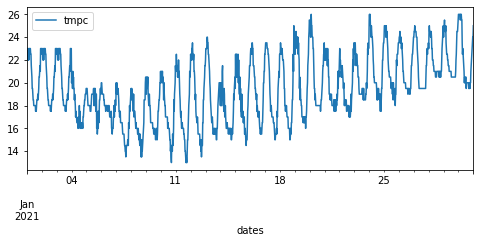

In [31]:
#predicting measurements for January 2021
jan_df = pd.DataFrame(fin_mod.predict(X_new), columns=['tmpc'])
jan_df = jan_df.join(newdata['dates'])
jan_df.plot(x='dates',figsize=(8,3))


In [32]:
jan_df.describe()

,tmpc
count,1441.000000
mean,19.465996
std,2.782676
min,13.000000
25%,17.500000
50%,19.500000
75%,21.500000
max,26.000000


# Comments

I fitted four models, with a different amount of k neighbours (1,2,3 and 8). The MAE and RMSE values were better for larger amount of k neighbours, however for all models, MAE was somewhere between 1.96 and 2.40, and RMSE was somewhere between 2.54 and 3.09. These values are not great, but also not bad. Visually, the models with less k neighbours seem to be more accurate. This can be expected as by modelling the data to 1 or few nearest points, we can expect that model to be very similar to training data. In this case these models can still be useful as there was not a trend in the data. We can see that as the number of k neighbours increases, the predicted values smoothed out a lot more in comparison to models with less k neighbours. So I have chosen the model with k=2 neighbours as the final model, which has then been fitted using the entire dataset. The mean absolute error for this model is between 2.13 to 2.34 °C, and the root mean squared error is between 2.76 and 3.00 °C.

Using the final model, another month of measurements for the temperature of the environment was forecasted.